<a href="https://colab.research.google.com/github/Mund99/DSUB_5.0/blob/main/Project/Human_Resource_Attrition_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Human Resource Attrition Analysis**
---
Business Question 

---
Based on the HR dataset, identify the feature that has an relationship to the employee attrition and develop a model using Logistics Regression to predict the employee will left or stay. Apply the model to the second dataset to carry out the prediction and calculate the retention and attrition rate. 

In [1]:
# Import Libraries 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

# **Obtain Data**

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Mund99/DSUB_5.0/main/Dataset/HR_dataset.csv')
df.head()

,names,satisfaction_level,last_evaluation,number_project,average_monthly_hours,exp_in_company,work_accident,left,promotion_last_5years,role,salary
0,Jessica Stroud,0.38,0.53,2,157,3,0,1,0,sales,low
1,Daryl Fields,0.80,0.86,5,262,6,0,1,0,sales,medium
2,Daisy Anderson,0.11,0.88,7,272,4,0,1,0,sales,medium
3,Joseph Fernandez,0.72,0.87,5,223,5,0,1,0,sales,low
4,Herbert Moore,0.37,0.52,2,159,3,0,1,0,sales,low


# **Scrub Data**

In [3]:
# Check columns and their data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   names                  15000 non-null  object 
 1   satisfaction_level     15000 non-null  float64
 2   last_evaluation        15000 non-null  float64
 3   number_project         15000 non-null  int64  
 4   average_monthly_hours  15000 non-null  int64  
 5   exp_in_company         15000 non-null  int64  
 6   work_accident          15000 non-null  int64  
 7   left                   15000 non-null  int64  
 8   promotion_last_5years  15000 non-null  int64  
 9   role                   15000 non-null  object 
 10  salary                 15000 non-null  object 
dtypes: float64(2), int64(6), object(3)
memory usage: 1.3+ MB


**Findings:**
- This dataframe contains 15,000 of data 
- As there is no null value, removing missing data is not needed. 

In [4]:
# Check unique elements in each column
for i in df.columns: 
  print(f"Unique {i}'s count: {df[i].nunique()}")
  print(f"{df[i].unique()}\n")

Unique names's count: 14746
['Jessica Stroud' 'Daryl Fields' 'Daisy Anderson' ... 'Steven Freedman'
 'Randall Williams' 'Bessie Coleman']

Unique satisfaction_level's count: 92
[0.38 0.8  0.11 0.72 0.37 0.41 0.1  0.92 0.89 0.42 0.45 0.84 0.36 0.78
 0.76 0.09 0.46 0.4  0.82 0.87 0.57 0.43 0.13 0.44 0.39 0.85 0.81 0.9
 0.74 0.79 0.17 0.24 0.91 0.71 0.86 0.14 0.75 0.7  0.31 0.73 0.83 0.32
 0.54 0.27 0.77 0.88 0.48 0.19 0.6  0.12 0.61 0.33 0.56 0.47 0.28 0.55
 0.53 0.59 0.66 0.25 0.34 0.58 0.51 0.35 0.64 0.5  0.23 0.15 0.49 0.3
 0.63 0.21 0.62 0.29 0.2  0.16 0.65 0.68 0.67 0.22 0.26 0.99 0.98 1.
 0.52 0.93 0.97 0.69 0.94 0.96 0.18 0.95]

Unique last_evaluation's count: 65
[0.53 0.86 0.88 0.87 0.52 0.5  0.77 0.85 1.   0.54 0.81 0.92 0.55 0.56
 0.47 0.99 0.51 0.89 0.83 0.95 0.57 0.49 0.46 0.62 0.94 0.48 0.8  0.74
 0.7  0.78 0.91 0.93 0.98 0.97 0.79 0.59 0.84 0.45 0.96 0.68 0.82 0.9
 0.71 0.6  0.65 0.58 0.72 0.67 0.75 0.73 0.63 0.61 0.76 0.66 0.69 0.37
 0.64 0.39 0.41 0.43 0.44 0.36 0.38 0.4 

In [5]:
# Create dummies for salary to split the nominal data into binary
df = pd.get_dummies(data = df, columns = ['salary'])
df.head()

,names,satisfaction_level,last_evaluation,number_project,average_monthly_hours,exp_in_company,work_accident,left,promotion_last_5years,role,salary_high,salary_low,salary_medium
0,Jessica Stroud,0.38,0.53,2,157,3,0,1,0,sales,0,1,0
1,Daryl Fields,0.80,0.86,5,262,6,0,1,0,sales,0,0,1
2,Daisy Anderson,0.11,0.88,7,272,4,0,1,0,sales,0,0,1
3,Joseph Fernandez,0.72,0.87,5,223,5,0,1,0,sales,0,1,0
4,Herbert Moore,0.37,0.52,2,159,3,0,1,0,sales,0,1,0


In [6]:
# Check unique elements in each column
for i in df.columns: 
  print(f"Unique {i}'s count: {df[i].nunique()}")
  print(f"{df[i].unique()}\n")

Unique names's count: 14746
['Jessica Stroud' 'Daryl Fields' 'Daisy Anderson' ... 'Steven Freedman'
 'Randall Williams' 'Bessie Coleman']

Unique satisfaction_level's count: 92
[0.38 0.8  0.11 0.72 0.37 0.41 0.1  0.92 0.89 0.42 0.45 0.84 0.36 0.78
 0.76 0.09 0.46 0.4  0.82 0.87 0.57 0.43 0.13 0.44 0.39 0.85 0.81 0.9
 0.74 0.79 0.17 0.24 0.91 0.71 0.86 0.14 0.75 0.7  0.31 0.73 0.83 0.32
 0.54 0.27 0.77 0.88 0.48 0.19 0.6  0.12 0.61 0.33 0.56 0.47 0.28 0.55
 0.53 0.59 0.66 0.25 0.34 0.58 0.51 0.35 0.64 0.5  0.23 0.15 0.49 0.3
 0.63 0.21 0.62 0.29 0.2  0.16 0.65 0.68 0.67 0.22 0.26 0.99 0.98 1.
 0.52 0.93 0.97 0.69 0.94 0.96 0.18 0.95]

Unique last_evaluation's count: 65
[0.53 0.86 0.88 0.87 0.52 0.5  0.77 0.85 1.   0.54 0.81 0.92 0.55 0.56
 0.47 0.99 0.51 0.89 0.83 0.95 0.57 0.49 0.46 0.62 0.94 0.48 0.8  0.74
 0.7  0.78 0.91 0.93 0.98 0.97 0.79 0.59 0.84 0.45 0.96 0.68 0.82 0.9
 0.71 0.6  0.65 0.58 0.72 0.67 0.75 0.73 0.63 0.61 0.76 0.66 0.69 0.37
 0.64 0.39 0.41 0.43 0.44 0.36 0.38 0.4 

**Findings:**
- Continuous data - sastifaction level, last evaluation, number of project, average monthly hours, experience in company 
- Nominal data - roles 
- Binary data -  work accident, left, promotion last 5 years, salary (high, low, medium)

# **Explore Data**

In [7]:
# Descriptive Statistics
df.describe()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,exp_in_company,work_accident,left,promotion_last_5years,salary_high,salary_low,salary_medium
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,0.612847,0.716115,3.803133,201.052400,3.498333,0.144600,0.238133,0.021267,0.082467,0.487800,0.429733
std,0.248628,0.171171,1.232590,49.942074,1.460139,0.351709,0.425955,0.144277,0.275084,0.499868,0.495054
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Correlation and Heatmap

In [8]:
# Calculate the correlation 
corr = df.corr()
corr

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,exp_in_company,work_accident,left,promotion_last_5years,salary_high,salary_low,salary_medium
satisfaction_level,1.000000,0.105077,-0.142908,-0.020013,-0.100803,0.058673,-0.388225,0.025596,0.029691,-0.047355,0.031317
last_evaluation,0.105077,1.000000,0.349380,0.339770,0.131658,-0.007135,0.006701,-0.008695,-0.020650,0.005298,0.006125
number_project,-0.142908,0.349380,1.000000,0.417232,0.196839,-0.004767,0.023900,-0.006073,-0.008745,-0.002438,0.007321
average_monthly_hours,-0.020013,0.339770,0.417232,1.000000,0.127791,-0.010160,0.071353,-0.003550,-0.007114,-0.001008,0.004970
exp_in_company,-0.100803,0.131658,0.196839,0.127791,1.000000,0.002092,0.144924,0.067420,0.039931,-0.040037,0.018239
work_accident,0.058673,-0.007135,-0.004767,-0.010160,0.002092,1.000000,-0.154653,0.039249,0.009048,-0.006841,0.001879
left,-0.388225,0.006701,0.023900,0.071353,0.144924,-0.154653,1.000000,-0.061799,-0.120952,0.134825,-0.068927
promotion_last_5years,0.025596,-0.008695,-0.006073,-0.003550,0.067420,0.039249,-0.061799,1.000000,0.076759,-0.082839,0.040992
salary_high,0.029691,-0.020650,-0.008745,-0.007114,0.039931,0.009048,-0.120952,0.076759,1.000000,-0.292570,-0.260249
salary_low,-0.047355,0.005298,-0.002438,-0.001008,-0.040037,-0.006841,0.134825,-0.082839,-0.292570,1.000000,-0.847153


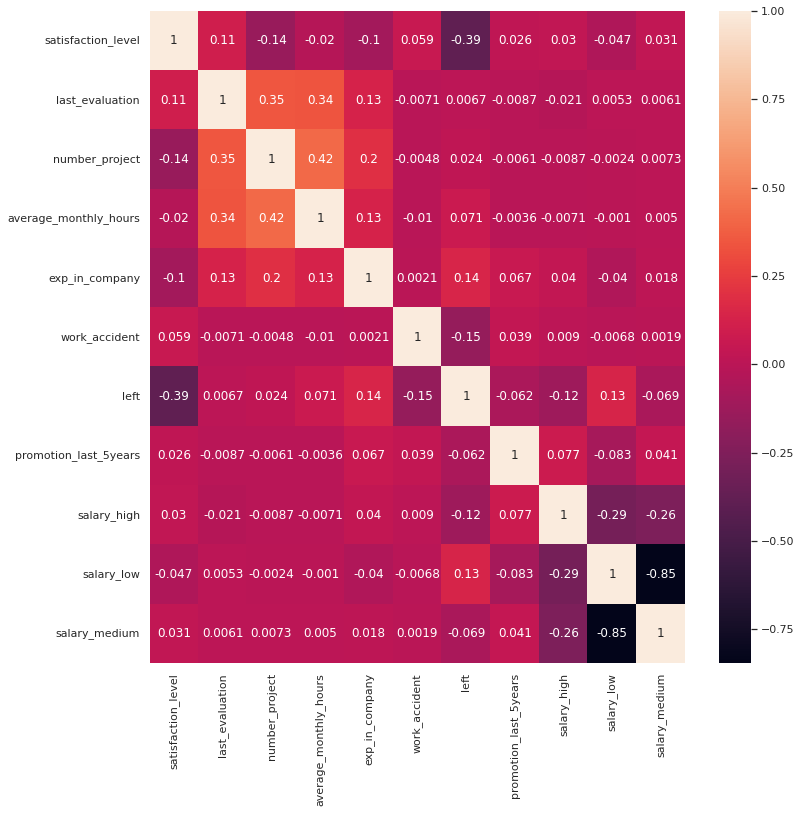

In [9]:
# Visualize the correlation using heatmap
sns.set(rc = {'figure.figsize':(12,12)})
sns.heatmap(corr, annot = True);

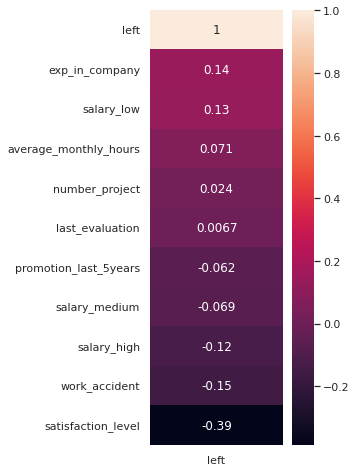

In [10]:
# Extract the target variable only 
sns.set(rc={'figure.figsize':(3,8)})
left_corr = df.corr()[['left']].sort_values(by='left', ascending=False)
sns.heatmap(left_corr, annot = True);

**Findings:** \
1. Employee sastifaction is the most eye catching and having the highest absolute value. The more unsastified the employee is, the higher possibility the employee will left. 
2. Employee would definitely prefer a safe workplace from accident, hence it's negative correlation. 
3. In terms of salary, those employee would low is likely having low salary.  
4. The correlation for work experience is positive, which means the usual employee that are leaving are the employee with higher experience. 

## Countplot for Employee Rentention and Attrition

In [9]:
# Create a dataframe that calcaulate the rate of employee rentention and attrition
left_0  = df.groupby(df['role'][df['left'] == 0]).size().reset_index(name='Left_0')
left_1  = df.groupby(df['role'][df['left'] == 1]).size().reset_index(name='Left_1')

total_emp  = df.groupby('role').size().reset_index(name='Total')
df_left  = pd.concat([left_0, left_1['Left_1'],total_emp['Total']], axis=1, join="inner")

df_left['Left_0_Rate'] = round((df_left['Left_0']/df_left['Total'])*100,2)
df_left['Left_1_Rate'] = round((df_left['Left_1']/df_left['Total'])*100,2)

df_left_rate = df_left[['role', 'Left_0_Rate', 'Left_1_Rate']]
df_left_rate

,role,Left_0_Rate,Left_1_Rate
0,IT,77.75,22.25
1,RandD,84.63,15.37
2,accounting,73.40,26.60
3,hr,70.91,29.09
4,management,85.56,14.44
5,marketing,76.34,23.66
6,product_mng,78.05,21.95
7,sales,75.51,24.49
8,support,75.10,24.90
9,technical,74.35,25.65


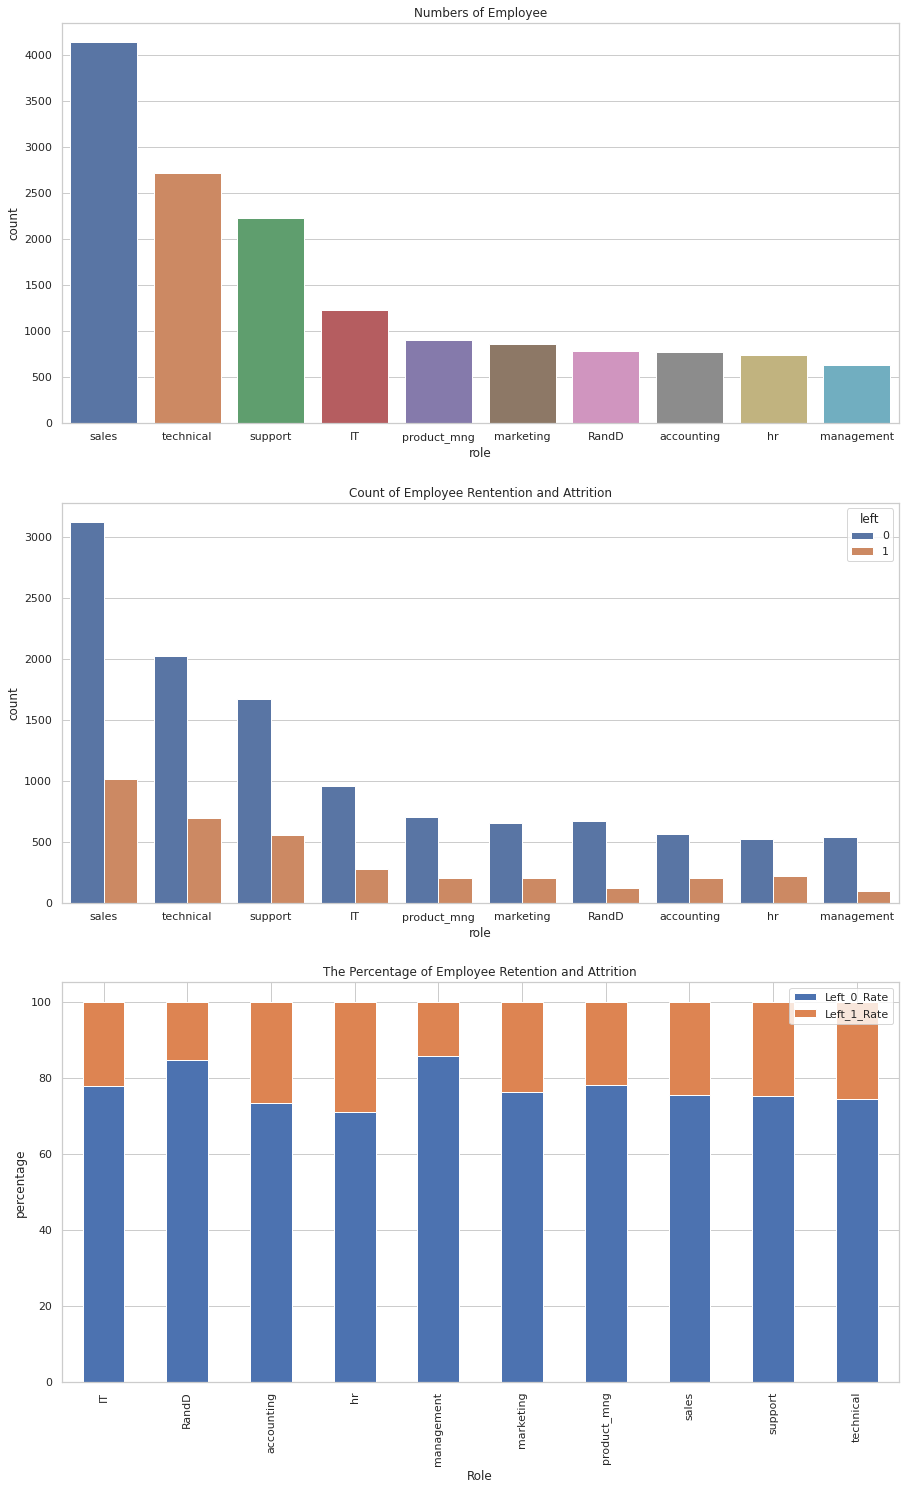

In [11]:
# Create three subplots and set the size 
main, subplots = plt.subplots(3, 1)
sns.set(rc = {'figure.figsize':(15,25)}, style='whitegrid')

# Plot 1 - Employee in each role
sns.countplot(data=df, x="role", order = df['role'].value_counts().index, ax = subplots[0]);
subplots[0].title.set_text('Numbers of Employee') 

# Plot 2 - Count of Employee Rentention and Attrition
sns.countplot(data = df, x = "role", hue = "left", order = df['role'].value_counts().index, ax = subplots[1]);
subplots[1].title.set_text('Count of Employee Rentention and Attrition') 

# Plot 3 - The Percentage of Employee Retention and Attrition  
df_left_rate.plot(kind='bar', stacked=True, x='role', xlabel='Role', ylabel='percentage', ax = subplots[2]);
subplots[2].title.set_text('The Percentage of Employee Retention and Attrition') 

**Findings:**
- The highest attrition rate is from the role of HR, accounting, and technical. 
- The lowest attrition rate is from the role of management, and R&D. 
- The attrition rate is with a min-max of 14.44 - 26.60, which would be consider as normal distributed among all roles.  

## Countplot for Binary Data

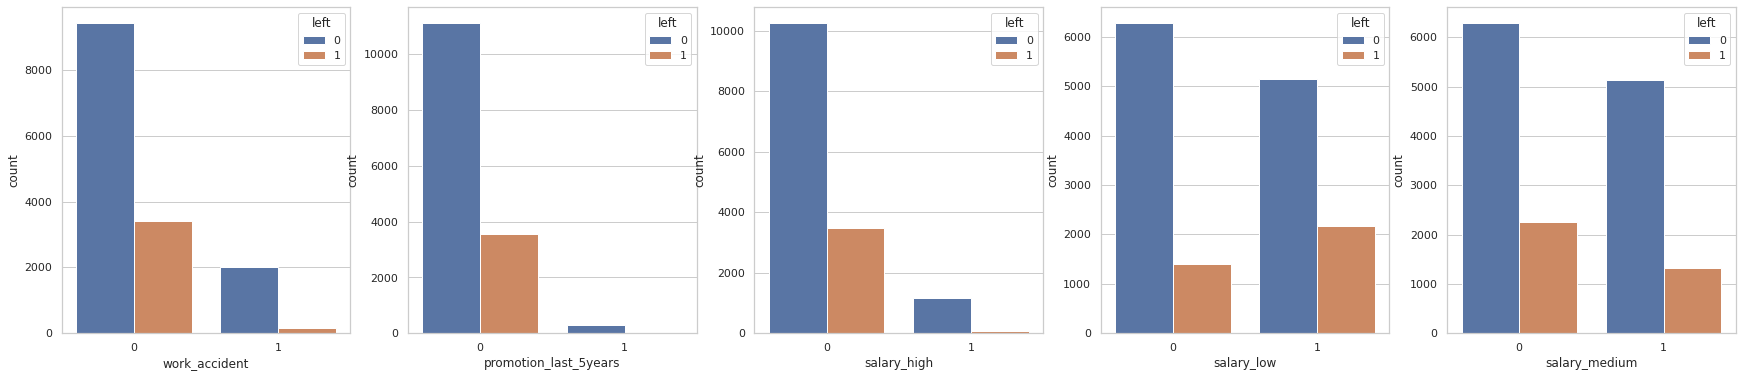

In [12]:
main, subplots = plt.subplots(1, 5, figsize=(30,6))
sns.countplot(data=df, x="work_accident", hue="left", ax=subplots[0]);
sns.countplot(data=df, x="promotion_last_5years", hue="left", ax=subplots[1]);
sns.countplot(data=df, x="salary_high", hue="left", ax=subplots[2]);
sns.countplot(data=df, x="salary_low", hue="left", ax=subplots[3]);
sns.countplot(data=df, x="salary_medium", hue="left", ax=subplots[4]);

**Findings:** 
- Employee would prefer to work at place that is safe from accident. 
- Employee without promotion for the last 5 years would highly to left the company.  
- In terms of salary category, employee with low salary would usually left as compared to high and medium salary employee. 

## Boxplot for Continuous Data

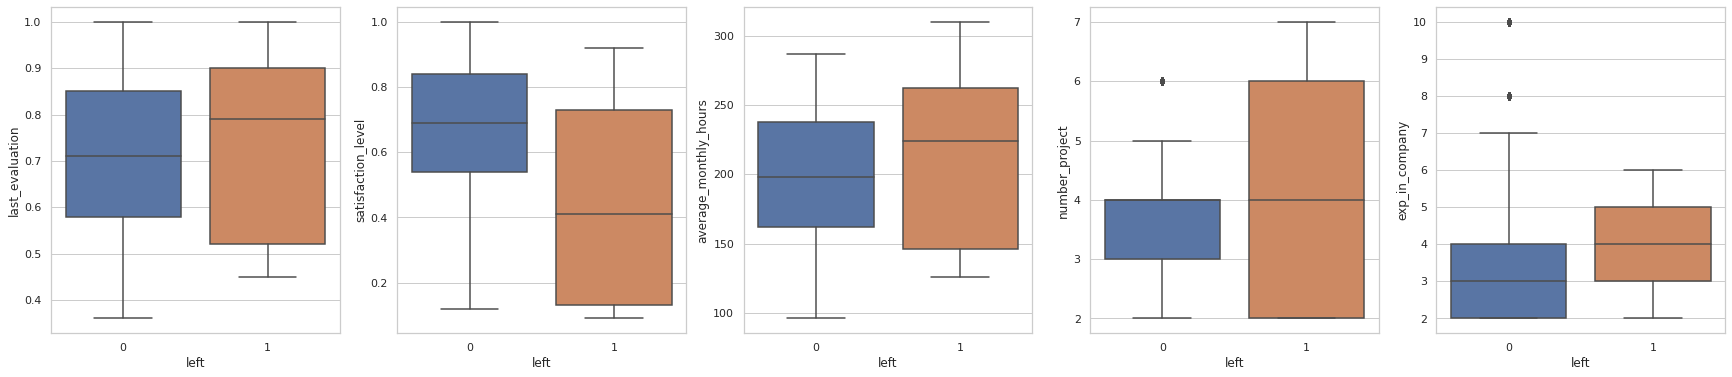

In [14]:
main, subplots = plt.subplots(1, 5, figsize=(30,6))
sns.boxplot(data=df, y="last_evaluation", x="left", ax=subplots[0]);
sns.boxplot(data=df, y="satisfaction_level", x="left", ax=subplots[1]);
sns.boxplot(data=df, y="average_monthly_hours", x="left", ax=subplots[2]);
sns.boxplot(data=df, y="number_project", x="left", ax=subplots[3]);
sns.boxplot(data=df, y="exp_in_company", x="left", ax=subplots[4]);

**Findings:**
- The sastifaction level shows that employee with low sastifaction a median of 0.4 would left the company. 
- The higher the number of project, the higher possibility an employee would left. 
- The last evaluation, average monthy hour and experience in compnay does not shows a drastic information from the boxplot. 

# **Model Data**

## Logistic Regression Model

In [18]:
# Setting the data feature and target 
features = ['satisfaction_level', 'number_project', 'exp_in_company', 'promotion_last_5years']
train_data = df[features]
train_target = df['left']

# Split the dataset into test set and train set 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(train_data, train_target, test_size = 0.3, random_state = 1)

# Apply Logistic Regression model 
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

# Perform prediction and calculate the accuracy 
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
score = accuracy_score(y_test,y_pred) * 100
print(f"The prediction accuracy score is {(score):.2f}%")

The prediction accuracy score is 75.73%


## Prediction Dataset

In [19]:
# Import prediction dataset 
df_pred = pd.read_csv('https://raw.githubusercontent.com/Mund99/DSUB_5.0/main/Dataset/hr_predict.csv')
df_pred.head()

,id,names,satisfaction_level,last_evaluation,number_project,average_monthly_hours,exp_in_company,work_accident,promotion_last_5years,role,salary,salary_class,role_class
0,2237,Paul Mathey,0.74,0.72,4,176,3,0,0,sales,low,1,1
1,8127,Shawn Torres,0.72,0.88,3,224,3,0,0,technical,low,1,2
2,8146,Emily Staples,0.52,0.67,4,216,3,0,0,support,medium,2,3
3,14441,Jean Salazar,0.42,0.47,2,159,3,0,0,marketing,low,1,6
4,11909,Javier Folse,0.85,0.58,4,186,7,0,0,sales,medium,2,1


In [20]:
X_pred = df_pred[features]
X_pred.info()   # The data entry contain 100 different employee

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     100 non-null    float64
 1   number_project         100 non-null    int64  
 2   exp_in_company         100 non-null    int64  
 3   promotion_last_5years  100 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 3.2 KB


In [21]:
# Predict the attrition and add the result into the dataframe
y_pred = model.predict(X_pred)
df_pred['left_pred'] = y_pred

# Calcuation the rate 
retention = (df_pred[df_pred['left_pred'] == 0].shape[0]) /  df_pred.shape[0] * 100 
attrition = (df_pred[df_pred['left_pred'] == 1].shape[0]) /  df_pred.shape[0] * 100 

# Print the output 
print(f"The predicted retention rate of the employee is {retention} %")
print(f"The predicted attrition rate of the employee is {attrition} %")

The predicted retention rate of the employee is 91.0 %
The predicted attrition rate of the employee is 9.0 %
